HOW TO USE MARKDOWN

main title
==========

sub title
----------

# this is h1
## this is h2
### this is h3
#### this is h4
##### this is h5
###### this is h6

------------------------------------


1. first
2. second
3. thrid


* Korea
* America
* US

-----------------------------------


한줄 띄어쓰지 않으면 인식이 제대로 안됨.
This is a normal paragraph:

    this is a code block.

end code block

----------------------------------
How to insert code in markdown?

1. ''' codes~~~ '''

<pre>
<code>
public class BootSpringBootApplication {
  public static void main(String[] args) {
    System.out.println("Hello, Honeymon");
  }
}
</code>
</pre>


Datasets & DataLoader
=======

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train = True, 
    download=True, 
    transform=ToTensor() 
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



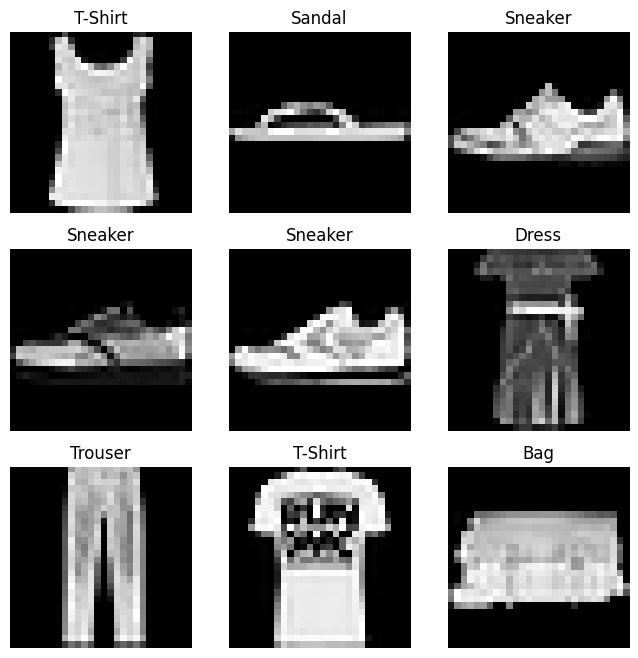

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coar",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols*rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [ ]:
import os 
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  # 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화합니다.
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  # __len__ 함수는 데이터셋의 샘플 개수를 반환합니다. 
  def __len__(self):
    return len(self.img_labels)

  '''
  __getitem__ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다. 
  인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, read_image 를 사용하여 이미지를 텐서로 변환하고, 
  self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, 
  (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 
  텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.
  '''
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

DataLoader로 학습용 데이터 준비하기
-------
Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.

DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

DataLoader를 통해 순회하기(iterate)
-----
DataLoader 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다. 아래의 각 순회(iteration)는 (각각 batch_size=64 의 특징(feature)과 정답(label)을 포함하는) train_features 와 train_labels 의 묶음(batch)을 반환합니다. shuffle=True 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다. (데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 Samplers 를 살펴보세요.)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


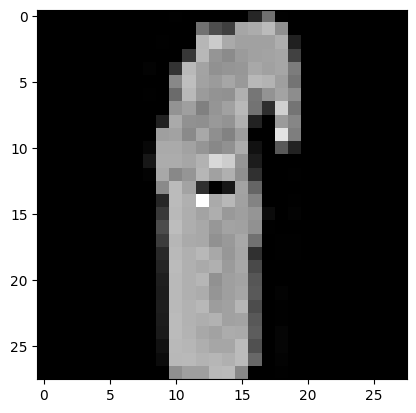

Label: 3


In [7]:
#
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

-변형(TRANSFORM)
===========

데이터가 항상 머신러닝 알고리즘 학습에 필요한 최종 처리가 된 형태로 제공되지는 않습니다. 변형(transform) 을 해서 데이터를 조작하고 학습에 적합하게 만듭니다.

모든 TorchVision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체(callable)를 받는 매개변수 두개 ( 
    
    1. 특징(feature)을 변경하기 위한 transform 과 

    2.정답(label)을 변경하기 위한 target_transform )를 갖습니다 

    torchvision.transforms 모듈은 주로 사용하는 몇가지 변형(transform)을 제공합니다.

FashionMNIST 특징(feature)은 PIL Image 형식이며, 정답(label)은 정수(integer)입니다. 학습을 하려면 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)이 필요합니다. 이러한 변형(transformation)을 하기 위해 ToTensor 와 Lambda 를 사용합니다.

In [8]:
import torch 
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


ToTensor()
----

ToTensor 는 PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)합니다.

Lambda 변형(Transform)
-------

Lambda 변형은 사용자 정의 람다(lambda) 함수를 적용합니다. 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의합니다. 이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고, scatter_ 를 호출하여 주어진 정답 y 에 해당하는 인덱스에 value=1 을 할당합니다.

In [9]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
)

-신경망 모델 구성하기
========

신경망은 데이터에 대한 연산을 수행하는 계층(layer)/모듈(module)로 구성되어 있습니다. torch.nn 네임스페이스는 신경망을 구성하는데 필요한 모든 구성 요소를 제공합니다. PyTorch의 모든 모듈은 nn.Module 의 하위 클래스(subclass) 입니다. 신경망은 다른 모듈(계층; layer)로 구성된 모듈입니다. 이러한 중첩된 구조는 복잡한 아키텍처를 쉽게 구축하고 관리할 수 있습니다.

이어지는 장에서는 FashionMNIST 데이터셋의 이미지들을 분류하는 신경망을 구성해보겠습니다.

In [10]:
import os 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

학습을 위한 장치 얻기
-------

가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려고 합니다. torch.cuda 를 사용할 수 있는지 확인하고 그렇지 않으면 CPU를 계속 사용합니다.


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


클래스 정의하기
--------

신경망 모델을 nn.Module 의 하위클래스로 정의하고, __init__ 에서 신경망 계층들을 초기화합니다. nn.Module 을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산들을 구현합니다.

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 18),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

NeuralNetwork 의 인스턴스(instance)를 생성하고 이를 device 로 이동한 뒤, 구조(structure)를 출력합니다.

In [13]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=18, bias=True)
  )
)


모델을 사용하기 위해 입력 데이터를 전달합니다. 이는 일부 백그라운드 연산들 과 함께 모델의 forward 를 실행합니다. model.forward() 를 직접 호출하지 마세요!


모델에 입력을 호출하면 각 분류(class)에 대한 원시(raw) 예측값이 있는 10-차원 텐서가 반환됩니다. 원시 예측값을 nn.Softmax 모듈의 인스턴스에 통과시켜 예측 확률을 얻습니다.

In [15]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([17])


모델 계층(Layer)
------

FashionMNIST 모델의 계층들을 살펴보겠습니다. 이를 설명하기 위해, 28x28 크기의 이미지 3개로 구성된 미니배치를 가져와, 신경망을 통과할 때 어떤 일이 발생하는지 알아보겠습니다.

In [17]:
input_img = torch.rand(3, 28, 28)
print(input_img.size())

torch.Size([3, 28, 28])


nn.Flatten
---------

nn.Flatten 계층을 초기화하여 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다. (dim=0의 미니배치 차원은 유지됩니다.)

In [18]:
flatten = nn.Flatten()
flat_img = flatten(input_img)
print(flat_img.size())

torch.Size([3, 784])


nn.Linear
--------
선형 계층 은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈입니다.

In [19]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_img)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU
-------

비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 
비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다.

이 모델에서는 nn.ReLU 를 선형 계층들 사이에 사용하지만, 모델을 만들 때는 비선형성을 가진 다른 활성화를 도입할 수도 있습니다.

In [20]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0679,  0.1342, -0.2463, -0.0326,  0.2092,  0.1532,  0.0995,  0.2110,
         -0.1981, -0.2086, -0.0739,  0.2698,  0.1864, -0.3244,  0.4951,  0.0092,
          0.3381, -0.2205, -0.2342, -0.0487],
        [-0.3530,  0.4394, -0.3348, -0.1092, -0.0809, -0.1205,  0.4195, -0.0583,
         -0.2468, -0.2163,  0.0261,  0.3629,  0.0526, -0.0884,  0.0382,  0.2844,
          0.2690, -0.2436, -0.2364,  0.0113],
        [-0.1541,  0.7363, -0.6765,  0.0619,  0.2591, -0.1058,  0.1150, -0.3773,
          0.0830, -0.1840, -0.3900,  0.2970,  0.1877, -0.3485,  0.3779,  0.1000,
          0.2627, -0.1647,  0.1219, -0.1847]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.1342, 0.0000, 0.0000, 0.2092, 0.1532, 0.0995, 0.2110, 0.0000,
         0.0000, 0.0000, 0.2698, 0.1864, 0.0000, 0.4951, 0.0092, 0.3381, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.4394, 0.0000, 0.0000, 0.0000, 0.0000, 0.4195, 0.0000, 0.0000,
         0.0000, 0.0261, 0.3629, 0.0526, 0.0000, 0.03

nn.Sequential
--------
nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.